In [1]:
import os
import tensorflow as tf
import scipy.misc
import numpy as np
import imageio
import datetime
from PIL import Image

In [2]:
import matplotlib.pyplot as plt

In [3]:
import data

In [4]:
data.wikiart

'/tf/painter/data/wikiart'

In [5]:
wikiart_paths = data.get_data_path(data.wikiart, data.get_log_path())

[image loader] log_path : /tf/painter/data/_log/2021-06-06-05-55-32
start /tf/painter/data/wikiart/Naive_Art_Primitivism
finish
start /tf/painter/data/wikiart/High_Renaissance
finish
start /tf/painter/data/wikiart/Rococo
finish
start /tf/painter/data/wikiart/Impressionism
finish
start /tf/painter/data/wikiart/Ukiyo_e
finish
start /tf/painter/data/wikiart/Pop_Art
finish
start /tf/painter/data/wikiart/Cubism
finish
start /tf/painter/data/wikiart/Fauvism
finish
start /tf/painter/data/wikiart/Expressionism
finish
start /tf/painter/data/wikiart/Pointillism
finish
start /tf/painter/data/wikiart/Minimalism
finish
start /tf/painter/data/wikiart/Synthetic_Cubism
finish
start /tf/painter/data/wikiart/Post_Impressionism
finish
start /tf/painter/data/wikiart/Northern_Renaissance
finish
start /tf/painter/data/wikiart/Baroque
finish
start /tf/painter/data/wikiart/New_Realism
finish
start /tf/painter/data/wikiart/Analytical_Cubism
finish
start /tf/painter/data/wikiart/Abstract_Expressionism
finish
st

In [6]:
sample = data.imread(wikiart_paths[0])

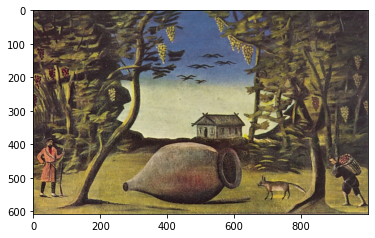

In [7]:
plt.imshow(sample)

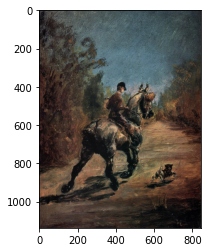

In [8]:
plt.imshow(data.imread(wikiart_paths[10000]))

In [9]:
kaggle_paths = data.get_data_path(data.kaggle, data.get_log_path())

[image loader] log_path : /tf/painter/data/_log/2021-06-06-05-55-34
start /tf/painter/data/preprocessed_kaggle/train
finish
start /tf/painter/data/preprocessed_kaggle/test
finish


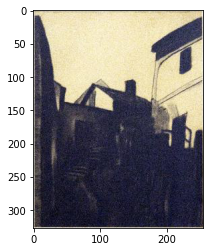

In [10]:
plt.imshow(data.imread(kaggle_paths[10000]))

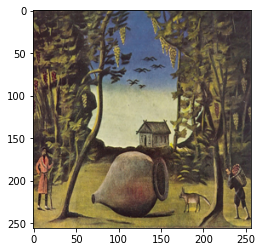

In [11]:
plt.imshow(data.get_image(wikiart_paths[0], resize_height=256, resize_width=256)['normalized_data_zp1'])

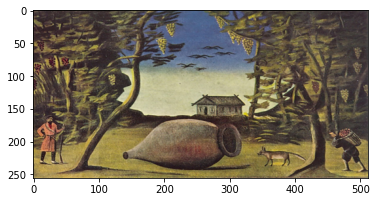

In [12]:
plt.imshow(data.get_image(wikiart_paths[0], resize_height=512, resize_width=256)['normalized_data_zp1'])

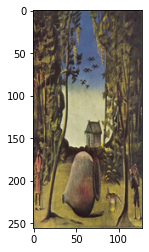

In [13]:
plt.imshow(data.get_image(wikiart_paths[0], resize_height=128, resize_width=256)['normalized_data_zp1'])

In [14]:
data.get_image(wikiart_paths[0], resize_height=128, resize_width=256)['normalized_data_zp1'].dtype

dtype('float64')

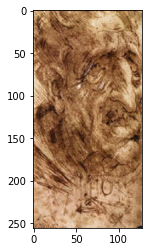

In [15]:
plt.imshow(data.get_image(kaggle_paths[0], resize_height=128, resize_width=256)['normalized_data_zp1'])

In [77]:
class DataGenerator(object):
    def __init__(self):
        self.resize_size = (256, 256, 3)
        self.kaggle_paths = data.get_data_path(data.kaggle, data.get_log_path())
        self.wikiart_paths = data.get_data_path(data.wikiart, data.get_log_path())
        self.data_paths = self.kaggle_paths + self.wikiart_paths
        self.datasetlen = len(self.data_paths)
        self.id = 0
        print('dataset length : %s' % (self.datasetlen))
    
    def get_one_sample(self,give_id=None):
        if self.id == self.datasetlen:
            self.id = 0
        if give_id==None:
            img_id = self.id
        else:
            img_id = give_id

        imgs = data.get_image(self.data_paths[img_id], 
                       resize_height=self.resize_size[0], 
                       resize_width=self.resize_size[1])

        if len(imgs)<=0:
            self.id +=1
            return None

        self.id += 1
        # normalized_data_n1p1 : from negative 1 to positive 1 normalized
        # normalized_data_zp1 : from zero to positive 1 normalized
        return [imgs['normalized_data_n1p1'], imgs['normalized_data_zp1']]
                
    def gen_sample(self,batch_size=1):
        h,w,c = self.resize_size
        while True:
            for i in range(batch_size):
                sample = self.get_one_sample()
                while sample ==None: # not to train the images with no instance
                    sample = self.get_one_sample()           
                
                yield sample[0], sample[1]
    
    def gen_batch(self,batch_size=4):
        h,w,c = self.resize_size
        while True:
            img_negative_1_to_positive_1_batch = np.zeros((batch_size,h,w,c))
            img_zero_to_posivie_1_batch = np.zeros((batch_size,h,w,c))

            for i in range(batch_size):
                sample = self.get_one_sample()
                while sample ==None: # not to train the images with no instance
                    sample = self.get_one_sample()           
                img_negative_1_to_positive_1_batch[i] = sample[0]
                img_zero_to_posivie_1_batch[i] = sample[1]
             
            yield img_negative_1_to_positive_1_batch, img_zero_to_posivie_1_batch

In [78]:
datagen = DataGenerator().gen_sample
dataset = tf.data.Dataset.from_generator(
     datagen,
     output_signature=(
         tf.TensorSpec(shape=(256, 256, 3), dtype=tf.float64),
         tf.TensorSpec(shape=(256, 256, 3), dtype=tf.float64)))

[image loader] log_path : /tf/painter/data/_log/2021-06-06-06-11-05
start /tf/painter/data/preprocessed_kaggle/train
finish
start /tf/painter/data/preprocessed_kaggle/test
finish
[image loader] log_path : /tf/painter/data/_log/2021-06-06-06-11-07
start /tf/painter/data/wikiart/Naive_Art_Primitivism
finish
start /tf/painter/data/wikiart/High_Renaissance
finish
start /tf/painter/data/wikiart/Rococo
finish
start /tf/painter/data/wikiart/Impressionism
finish
start /tf/painter/data/wikiart/Ukiyo_e
finish
start /tf/painter/data/wikiart/Pop_Art
finish
start /tf/painter/data/wikiart/Cubism
finish
start /tf/painter/data/wikiart/Fauvism
finish
start /tf/painter/data/wikiart/Expressionism
finish
start /tf/painter/data/wikiart/Pointillism
finish
start /tf/painter/data/wikiart/Minimalism
finish
start /tf/painter/data/wikiart/Synthetic_Cubism
finish
start /tf/painter/data/wikiart/Post_Impressionism
finish
start /tf/painter/data/wikiart/Northern_Renaissance
finish
start /tf/painter/data/wikiart/Baroq

In [79]:
sample_batch = list(dataset.take(3))

In [82]:
datagen = DataGenerator().gen_batch
dataset = tf.data.Dataset.from_generator(
     datagen,
     output_signature=(
         tf.TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float64),
         tf.TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float64)))

[image loader] log_path : /tf/painter/data/_log/2021-06-06-06-12-12
start /tf/painter/data/preprocessed_kaggle/train
finish
start /tf/painter/data/preprocessed_kaggle/test
finish
[image loader] log_path : /tf/painter/data/_log/2021-06-06-06-12-13
start /tf/painter/data/wikiart/Naive_Art_Primitivism
finish
start /tf/painter/data/wikiart/High_Renaissance
finish
start /tf/painter/data/wikiart/Rococo
finish
start /tf/painter/data/wikiart/Impressionism
finish
start /tf/painter/data/wikiart/Ukiyo_e
finish
start /tf/painter/data/wikiart/Pop_Art
finish
start /tf/painter/data/wikiart/Cubism
finish
start /tf/painter/data/wikiart/Fauvism
finish
start /tf/painter/data/wikiart/Expressionism
finish
start /tf/painter/data/wikiart/Pointillism
finish
start /tf/painter/data/wikiart/Minimalism
finish
start /tf/painter/data/wikiart/Synthetic_Cubism
finish
start /tf/painter/data/wikiart/Post_Impressionism
finish
start /tf/painter/data/wikiart/Northern_Renaissance
finish
start /tf/painter/data/wikiart/Baroq

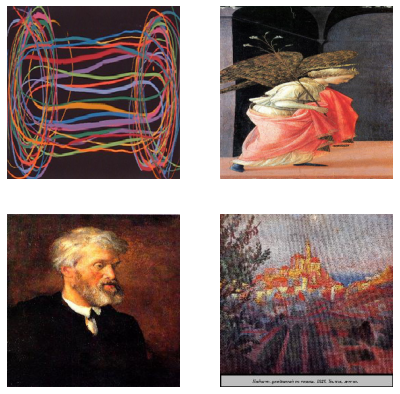

In [87]:
plt.figure(figsize=(7,7))
for _, images in dataset.take(1):
  for i in range(4):
    ax = plt.subplot(2, 2, i + 1)
    plt.imshow(images[i].numpy().astype("float64"))
    plt.axis("off")
